# Plotting Local Field of Spiral Tips
Tim Tyree<br>
2.16.2022

In [6]:
from lib.my_initialization import *
from lib import *

%autocall 1
%load_ext autoreload
%autoreload 2

Automatic calling is: Smart


# define module

In [100]:
def recall_flow_map_fk(diffCoef=0.0005,width=200,height=200,dsdpixel=0.025,param_fn = 'param_set_8.json'):
    """recalls parameter set 8 by default for the fenton-karma model.
    Example Usage:
get_time_step_fk,one_step_fk=recall_flow_map_fk(diffCoef=0.0005,width=200,height=200,dsdpixel=0.025)
    """
    #recall the flow map for the fenton-karma model
    print(f"param_fn is {param_fn}.")
    param_dir = os.path.join(nb_dir,'lib/model')
    param_dict = json.load(open(os.path.join(param_dir,param_fn)))
    param_dict['diffCoef']=diffCoef
    #get time step with external stimulus for FK model
    get_time_step_fk=fetch_get_time_step(width,height,DX=dsdpixel,DY=dsdpixel,**param_dict)
    one_step_fk=fetch_time_step(width,height,DX=dsdpixel,DY=dsdpixel,**param_dict)
    return get_time_step_fk,one_step_fk


# plot a snapshot of the flow map of either model

In [9]:
save_folder=f'{nb_dir}/Figures/local-fields'
if not os.path.exists(save_folder):
    os.mkdir(save_folder)
os.chdir(save_folder)

In [10]:
search_for_file()

File: /Users/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-1/ic-in/ic_200x200.108.33.npz


'/Users/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-1/ic-in/ic_200x200.108.33.npz'

In [65]:
#TODO: load 1 initial condition from the Fenton-Karma model
ic_fn=f"{nb_dir}/Data/initial-conditions-suite-1/ic-in/ic_200x200.108.13.npz"
txt_fk=load_buffer(ic_fn)
txt_fk.shape

(200, 200, 3)

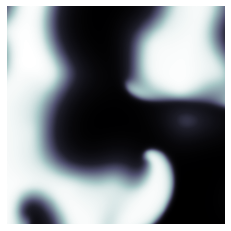

In [66]:
fontsize=16
#plot the field
plt.imshow(txt_fk[...,0],cmap='bone')
plt.axis('off')
plt.show()
# vmin_img=0.
# vmax_img=0.2,
# # ax.imshow(dimgdt, cmap=plt.cm.gray,vmin=vmin_img,vmax=vmax_img)

#TODO: #plot spiral tips. color inner spiral tip by slow variable
# ax.scatter(x=x_values, y=y_values, s=270, c=1+0.*c_values, marker='*', zorder=3, alpha=1., vmin=0,vmax=1)
# ax.scatter(x=x_values, y=y_values, s=135, c=c_values, marker='*', zorder=3, alpha=1., vmin=0,vmax=1, cmap='prism')

param_fn is param_set_8.json.


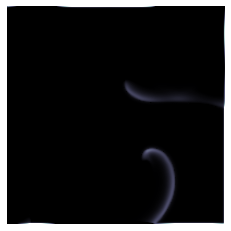

In [64]:
##DONE: compute the flow map for the Fenton-Karma model
width  = int(texture.shape[0])
height = int(texture.shape[1])
diffCoef_fk=0.0005
# diffCoef_fk=0.001
get_time_step_fk,one_step_fk=recall_flow_map_fk(diffCoef=diffCoef_fk,width=width,height=height,dsdpixel=0.025)
dt=0.025

zero_txt=np.zeros_like(texture)
texture_nxt=zero_txt.copy()
# one_step_fk(texture, dt, texture_nxt)
# plt.imshow((texture_nxt-texture)[...,0]/dt,cmap='bone',vmin=0,vmax=0.5)

dtxt_dt=zero_txt.copy()
get_time_step_fk(texture, dtxt_dt)
plt.imshow(dtxt_dt[...,0],cmap='bone',vmin=0,vmax=0.5)
plt.axis('off')
plt.show()

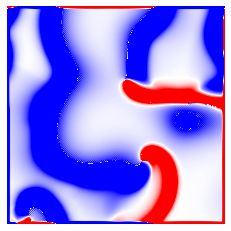

In [71]:
# plt.imshow(np.abs(dtxt_dt[...,0]),cmap='bone',vmin=0,vmax=0.01)
plt.imshow(dtxt_dt[...,0],cmap='bwr',vmin=-0.01,vmax=0.01)
plt.axis('off')
plt.show()

In [ ]:
#compute the next frame
txt=txt_fk
dtxt_dt=zero_txt.copy()
get_time_step_fk(txt, dtxt_dt)
txt_nxt=txt + dt*dtxt_dt

In [ ]:
#reinitialize perturbed origin
# lst_x, lst_y = ([], [])
# lst_tip_states = []
tip_state_lst = []
tme = 0
sigma = 4
threshold = 0.6
# load txt
print('loading initial buffer...')
# perturb = f'ic_deg_45_sigma_{sigma}_threshold_{threshold}'
# perturb = f'chaos_circle6_sigma_{sigma}_threshold_{threshold}_wrapping_true'
perturb = 'from_ic_600x600.101'
print(f"perturb = {perturb}.")
# data_dir = nb_dir+'/Data/ic_deg_45_0.npz'
data_dir = nb_dir+'/Data/ic_600x600.101.npz'
txt = load_buffer(data_dir)

# txt = np.load(data_dir)
# txt = txt[txt.files[0]]
# txt = np.load(f'Data/buffer_chaos_circle6_sigma_2_at_time_1800.2.npy')
# txt = np.load(f'Data/buffer_time_origin_primed_with_circle6.npy')
# txt = np.load(f'Data/buffer_circle6_at_time_3012.8.npy')  #made spiral defect chaos!
# txt = np.load(f'Data/buffer_time_origin_primed_with_{perturb}.npy')
# txt = np.load('Data/buffer_time_origin_primed.npy')
# txt = np.load('Data/buffer_time_origin_primed_with_bar.npy')
describe(txt)
width, height, channel_no = txt.shape
zero_txt = np.zeros((width, height, channel_no), dtype=np.float64)
dtexture_dt = zero_txt.copy()
get_time_step(txt, dtexture_dt)

#calculate raw contour field for contours
img_nxt = txt[..., 0]

img_inc = ifilter(dtexture_dt[..., 0])  #mask of instantaneously increasing voltages 
img_inc = filters.gaussian(img_inc,sigma=sigma, mode='wrap')
contours_raw = measure.find_contours(img_nxt, level=0.5,fully_connected='low',positive_orientation='low')
contours_inc = measure.find_contours(img_inc, level=threshold)#,fully_connected='low',positive_orientation='low')

#tip locating for stable parameters
# img_inc = (img_nxt * ifilter(dtexture_dt[..., 0]))**2  #mask of instantaneously increasing voltages 
# img_inc = filters.gaussian(img_inc,sigma=1.)#,truncate=1.0)
# contours_raw = measure.find_contours(img_nxt, level=0.5,fully_connected='low',positive_orientation='low')
# contours_inc = measure.find_contours(img_inc, level=0.0005)#,fully_connected='low',positive_orientation='low')

# x_lst, y_lst = tips_to_list(get_tips(contours_raw, contours_inc))
# len(x_lst)
# n_lst, x_lst, y_lst = enumerate_tips(get_tips(contours_raw, contours_inc))
# n_lst, x_lst, y_lst = get_tips(contours_raw, contours_inc)
# tip_states = {'n':n_lst,'x':x_lst,'y':y_lst}
# print(f"tip_states are {tip_states}.")
# # return {'tme':tme,'tip_states':tip_states}
# #TODO: generator expression yield {'tme':tme,'tip_states':tip_states}

tips = get_tips(contours_raw, contours_inc)
print(f"\n number of type 1 contour = {len(contours_raw)},\tnumber of type 2 contour = {len(contours_inc)},")
print(f"""the topological tip state is the following:
{tips[0]}""")
print(f"""x position of tips: {tips[1]}""")
print(f"""y position of tips: {tips[2]}""")

In [ ]:
fig, axs = display_texture(dtexture_dt/h, vmins=(0, 0, 0), vmaxs=(1, 1, 1))
fig, (ax1, ax2, ax3) = display_texture(txt, vmins=(0, 0, 0), vmaxs=(1, 1, 1))


# TODO: repeat with LR model

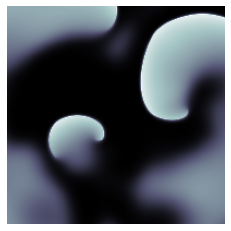

In [87]:
#TODO: load 1 initial condition from the Luo-Rudy model
# ic_fn=f"{nb_dir}/Data/initial-conditions-suite-3-LR/ic-out/ic008.33.npz"
ic_fn=f"{nb_dir}/Data/initial-conditions-suite-3-LR/ic-in/ic008.11.npz"
t=0

txt_lr=load_buffer(ic_fn)
txt_lr.shape


fontsize=16
#plot the field
plt.imshow(txt_lr[...,0],cmap='bone')
plt.axis('off')
plt.show()

In [90]:
ds=5.
frameno=1
# txt=load_buffer(txt_fn)
inVc,outVc,inmhjdfx,outmhjdfx,dVcdt=unstack_txt(txt_lr)
width,height=txt_lr.shape[:2]
V_threshold=-40
# dt=0.1 #supports really long termination time...
dt=0.025
diffCoef=0.001#0.0005
Cm=1.0
# comp_dict_topo_full_color=get_comp_dict_topo_full_color(width=width,height=height,level1=V_threshold,level2=V_threshold)
# get_one_step at this dt
__, arr39, one_step = get_one_step_explicit_synchronous_splitting(
    nb_dir,dt=dt,width=width,height=height,ds=ds,diffCoef=diffCoef,Cm=Cm)
# comp_dict_topo_simple=get_comp_dict_topo_simple(width=width,height=height,level1=V_threshold,level2=0)


_,arr39,one_step_lr=get_one_step_explicit_synchronous_splitting_w_Istim(nb_dir,dt=0.01,width=200,height=200,ds=5.,diffCoef=0.001,Cm=1.)#,**kwargs)

zeros_txt=np.zeros(shape=(width,height))
txt_Istim=zeros_txt.copy()
one_step_lr(inVc,outVc,inmhjdfx,outmhjdfx,dVcdt,txt_Istim)
#TODO: compute the flow map for the Luo-Rudy model
# one_step?

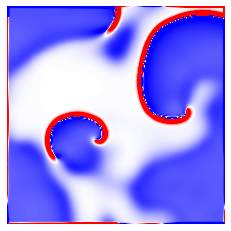

In [108]:
vmax=3
plt.imshow(dVcdt[...,0],cmap='bwr',vmin=-vmax,vmax=vmax)
plt.axis('off')
plt.show()

# TODO: compute the local field around a token spiral tip, center/rotate/flip it so the activation front is on the positive x-axis and is traveling in the positive y direction.  do this for both of the full models

In [139]:
V_threshold=-70
img=txt_lr[...,0]
dimgdt=dVcdt[...,0]
#TODO: compute the spiral tip locations at time t
compute_all_spiral_tips= get_compute_all_spiral_tips(mode='simp',width=width,height=height)
dict_out=compute_all_spiral_tips(t,img,dimgdt,level1=V_threshold,level2=0.)#,width=width,height=height)
print_dict(dict_out)

t=0.0
n=10
x=[0.8798424306560378, 0.9957952551903064, 45.310756618134604, 59.06561068613631, 82.34918187154808, 89.95484249321389, 164.0938424465366, 167.66766707862246, 199.6338944381958, 199.53932696367931]
y=[63.39358982247513, 121.46628746739172, 142.0137561033877, 197.6298075596787, 126.97738978454618, 26.63019880149163, 199.5136334341926, 92.04357673181259, 67.53561670614774, 88.87426496900945]
grad_ux=[1.3248880250148583, -1.2827374485396708, -0.9432311480731892, 10.306168595949904, 1.00963881487423, 0.7829841637408367, -0.056782771267949006, 1.5393113506876317, 1.2908063267728387, 1.449513484535537]
grad_uy=[0.9948620959883294, 1.0118472000775736, 1.6276711085386546, -1.7835844704177135, 0.9936665114810691, 1.7339934697756967, 1.8738508700202188, 0.017115898742518766, 0.13327042994597513, -0.019209206153767266]
grad_vx=[729.6494795551296, 64.43623498974371, 1.7710946326253842, 0.11941569375311674, -0.47901638158775034, 1.5333580469635755, 0.00154585372693747, -0.195928927869365

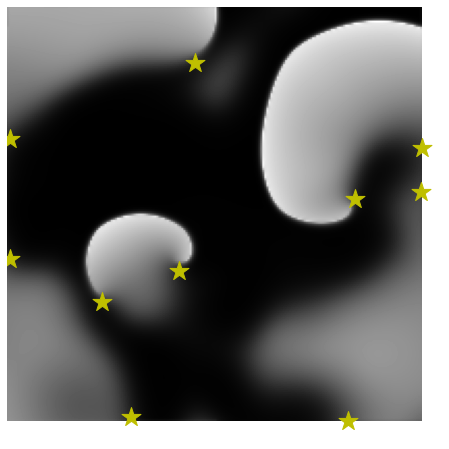

In [149]:
#scatter plot the spiral tips
x_values=np.array(dict_out['x'])
y_values=np.array(dict_out['y'])
fig,ax=plt.subplots(figsize=(8,8))
plt.imshow(img,cmap='gray')
plt.scatter(x_values,y_values,s=400,c='y',marker='*')
plt.axis('off')
plt.show()

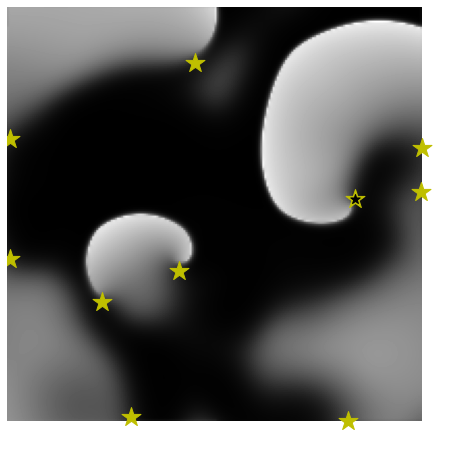

In [157]:
i=7
#scatter plot the spiral tips
x_values=np.array(dict_out['x'])
y_values=np.array(dict_out['y'])
fig,ax=plt.subplots(figsize=(8,8))
plt.imshow(img,cmap='gray')
plt.scatter(x_values,y_values,s=400,c='y',marker='*')

#TODO: select one that is in the interior
plt.scatter(x_values[i],y_values[i],s=100,c='k',marker='*')
#format
plt.axis('off')
plt.show()

In [ ]:
#TODO: pick one spiral tip location

In [105]:
#TODO: enforcing periodic boundary conditions. get the nearest NxN square neighborhood (functionally)


In [106]:
#TODO: visualize ^that nearest NxN square neighborhood (functionally)

In [107]:
#TOOD: identify the direction of the activation front (using moving avg. of the first n elements)
#TODO: zero ^that NxN field about the orgin. plot.
#TODO: compute any rotation s.t. the activation front is on the positive x-axis
#TODO(later?): consider flipping so they all have the same orientation?
#TODO(after ^that): avg. over a large number of events. they have time varying curvature. this is an interesting question for any field.

# TODO: plot key fields on the comparably oriented spiral tip field

In [ ]:
#TODO: compute the spiral tip locations at time t+dt
#TODO: compute the velocities
#TODO: find a reasonable span of dt where the velocity doesn't change much.
#HINT: try dt from an order of magnitude smaller/larger than my time step 

# #HINT:
# #TODO: compute the spiral tip locations at time t
# compute_all_spiral_tips= get_compute_all_spiral_tips(mode='simp',width=width,height=height)
# dict_out=compute_all_spiral_tips(t,img,dimgdt,level1=V_threshold,level2=0.)#,width=width,height=height)
# print(f"{ntips} tips are present at time t={int(t_prev)}.")

In [91]:
#DONT: plot the direciton the spiral tip is moving, as before
#TRIED. EASIER TO JUST REIMPLEMENT IN NUMPY?: find where I compute this before.
#TODO: plot direction the spiral tip is moving using quiver plot  


In [101]:
#TODO: plot divergence of electric field using heat plot  


In [102]:
#TODO: plot curl electric field using color/head plot  


# TODO: compute/plot the spiral tip trajectory in this new coordinate system for a small amount of time

# TODO: plot the voltage field in the direction that the spiral tip moves

# TODO: plot the fields derived from voltage in the direction that the spiral tip moves
Fields to try for $t$ fixed:
- $\partial_t V(x,y,t)$
- $\nabla V(x,y,t)\cdot \hat v_\text{spiral}(t)$ 
- $\nabla V(x,y,t)\times \hat v_\text{spiral}(t)$ 
- $\nabla^2 V(x,y,t)$ 
- $\nabla\times\nabla V(x,y,t) \cdot \hat z$ 

Suppose $\hat x$ points in the direction of $\hat v_\text{spiral}(t)$.<br>
Then, I could try these as measures of topological current:
- $\partial_t\partial_{x} V(x,y,t) - \partial_{x}\partial_t V(x,y,t)$
- $\partial_tI_\text{ion}(x,y,t)\partial_{x} V(x,y,t) - \partial_{x}I_\text{ion}(x,y,t)\partial_t V(x,y,t)$
- ibid with $x\leftrightarrow y$


$$
dR=-\frac{2\hat a}{R}dt + \sqrt{8D}dW_t,
$$

where $R$ is the Range between two spiral tips, $\hat a,D>0$, and $W_t$ is a stochastic Wiener process (Brownian motion).

We've shown an oscillatory model can explain the mean squared range (MSR) between spiral tips in the time leading up to annihilation, $t'=t_f-t$, specifically,

$$
dR=-\frac{2a}{R}\cos\big(\omega t' +\phi_f\big)dt' + \sqrt{4a}dW_{t'},
$$
where $\omega=\frac{2\pi}{T}$ is angular frequency, and $\phi_f$ is a final phase difference at annihilation, and $a>0$.

Supposing (dotted red/green) the linear particle model has the same MSR as (solid red/green) the oscillatory model, we found (C) a universal relation for $\hat a/a$ in terms of $\bar\Gamma/T$; 
works for two models of cardiac electrophysiology

# (scratchwerk) eqns for thesis

For constant cell velocity, $v_\text{max}\approx5 \mu$m/min fixed, and some minimum threshold gradient of attractant that can be sensed, $\theta$, we modeled the inward/outward motion of cells according to

\begin{eqnarray*}
v_\text{cell}(t) = \begin{cases} 
  +v_\text{max} & \partial_r\text{cAMP} \geq \theta \\
  0 & \text{else} \\
  -v_\text{max} & \partial_r\text{cAMP} \leq -\theta
\end{cases}
\end{eqnarray*}

## scratchpad for eqns for social recognition in primates

$$
\hat y_\text{face & voice}(\text{PO}) = \min\Big( \hat y_\text{face \wedge voice}(\text{PO}), \hat y_\text{face & voice}(\text{Any})\Big)
$$